### 5.2 データの前処理

In [1]:
import pandas as pd # pandasのインポート
import matplotlib.pyplot as plt
# irisファイルを読み込んで、データフレームに変換
df = pd.read_csv('../datafiles/iris.csv')
df.head(3) # 上位3件の表示

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
0,0.22,0.63,0.08,0.04,Iris-setosa
1,0.17,0.42,0.35,0.04,Iris-setosa
2,0.11,0.50,0.13,0.04,Iris-setosa


df['種類'].unique()
syurui = df['種類'].unique()
syurui[0]
df['種類'].value_counts()
df.tail(3)#末尾3件の表示
df.isnull()#各マスが欠損値かどうか調べる
#列単位で欠損値が存在するか調べる
df.isnull().any(axis=0)
df.sum() # 各列の合計値を計算
# 各列に欠損値がいくつあるか集計
tmp = df.isnull()
tmp.sum()

syurui = df['種類'].unique()
syurui[0]

df['種類'].value_counts()

df.tail(3)#末尾3件の表示

df.isnull()#各マスが欠損値かどうか調べる

#列単位で欠損値が存在するか調べる
df.isnull().any(axis=0)

df.sum() # 各列の合計値を計算

In [9]:
# 各列に欠損値がいくつあるか集計
tmp = df.isnull()
tmp.sum()

がく片長さ    2
がく片幅     1
花弁長さ     2
花弁幅      2
種類       0
dtype: int64

In [8]:
# 欠損値が1つでもある行を削除した結果を、df2に代入
# print(len(df))
df2 = df.dropna(how = 'any', axis = 0)
# print(len(df2))
# df2.tail(3) # 欠損値の存在確認
df.isnull().any(axis = 0)
df['花弁長さ'] = df['花弁長さ'].fillna(0)
df.tail(3)
#数値列の各平均値を計算（文字列の列は自動的に除外してくれる）
# df.mean()
df.drop("種類",axis=1).mean

#がく片長さ列の平均値を計算
df['がく片長さ'].mean()

がく片長さ     True
がく片幅      True
花弁長さ      True
花弁幅       True
種類       False
dtype: bool

In [4]:
df.isnull().any(axis = 0)

がく片長さ     True
がく片幅      True
花弁長さ      True
花弁幅       True
種類       False
dtype: bool

In [12]:
df['花弁長さ'] = df['花弁長さ'].fillna(0)
df.tail(3)

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
147,0.61,0.42,0.00,0.79,Iris-virginica
148,0.53,0.58,0.63,0.92,Iris-virginica
149,0.44,0.42,0.41,0.71,Iris-virginica


In [13]:
#数値列の各平均値を計算（文字列の列は自動的に除外してくれる）
# df.mean()
df.drop("種類",axis=1).mean


<bound method DataFrame.mean of      がく片長さ  がく片幅  花弁長さ   花弁幅
0     0.22  0.63  0.08  0.04
1     0.17  0.42  0.35  0.04
2     0.11  0.50  0.13  0.04
3     0.08  0.46  0.26  0.04
4     0.19  0.67  0.44  0.04
..     ...   ...   ...   ...
145   0.67  0.42  0.54  0.92
146   0.56  0.21  0.69  0.46
147   0.61  0.42  0.00  0.79
148   0.53  0.58  0.63  0.92
149   0.44  0.42  0.41  0.71

[150 rows x 4 columns]>

In [14]:
#がく片長さ列の平均値を計算
df['がく片長さ'].mean()

0.42087837837837844

In [15]:
# df.std() # 各列の標準偏差
# df.drop("種類",axis=1).std() # 各列の標準偏差
df.std(numeric_only=1) # 各列の標準偏差


がく片長さ    0.228910
がく片幅     0.181137
花弁長さ     0.236909
花弁幅      0.309960
dtype: float64

In [16]:
df = pd.read_csv('../datafiles/iris.csv')

# 各列の平均値を計算して、colmeanに代入
# colmean = df.mean()
colmean = df.mean(numeric_only=1)

# 平均値で欠損値を穴埋めしてdf2に代入
df2 = df.fillna(colmean)
# 欠損値があるか確認
df2.isnull().any(axis = 0)

がく片長さ    False
がく片幅     False
花弁長さ     False
花弁幅      False
種類       False
dtype: bool

In [17]:
xcol = ['がく片長さ', 'がく片幅', '花弁長さ', '花弁幅']

x = df2[xcol]
t = df2['種類']

In [18]:
# 関数のインポート
from sklearn import tree
# モデルの作成
model = tree.DecisionTreeClassifier(max_depth = 2,
                                    random_state=0)

In [19]:
model.fit(x, t) # モデルの学習
model.score(x, t) # 学習済みモデルの正解率計算

0.94

In [42]:
# 関数のインポート
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, t,
    test_size = 0.3, random_state = 0)

#x_train,y_trainが学習に利用する訓練
#x_test,y_testが検証に利用するテストデータ
y_train.value_counts()

種類
Iris-virginica     39
Iris-setosa        34
Iris-versicolor    32
Name: count, dtype: int64

In [45]:
import matplotlib.pyplot as plt


In [44]:
print(x_train.shape) # x_trainの行数・列数を表示
print(x_test.shape) # x_test　の行数・列数を表示

(105, 4)
(45, 4)


In [53]:
# 訓練データで再学習
model.fit(x_train, y_train)
print(x_train)
# print(type("x_train:",x_train))
print(y_train)
# print(type("y_train:",y_train))
# テストデータの予測結果と実際の答えが合致する正解率を計算
model.score(x_test, y_test)

     がく片長さ  がく片幅  花弁長さ   花弁幅
60    0.19  0.00  0.30  0.38
116   0.61  0.42  0.92  0.71
144   0.67  0.54  0.70  0.72
119   0.47  0.08  0.71  0.58
108   0.67  0.21  0.60  0.71
..     ...   ...   ...   ...
9     0.17  0.46  0.45  0.03
103   0.56  0.38  0.77  0.71
67    0.42  0.29  0.42  0.38
117   0.94  0.75  0.84  0.88
47    0.08  0.50  0.31  0.04

[105 rows x 4 columns]


TypeError: type() takes 1 or 3 arguments

In [48]:
import pickle
with open('irismodel.pkl', 'wb') as f:
    pickle.dump(model, f)

In [54]:
model.tree_.feature

array([ 3, -2,  3, -2, -2], dtype=int64)

In [55]:
model.tree_.threshold

array([ 0.275, -2.   ,  0.69 , -2.   , -2.   ])

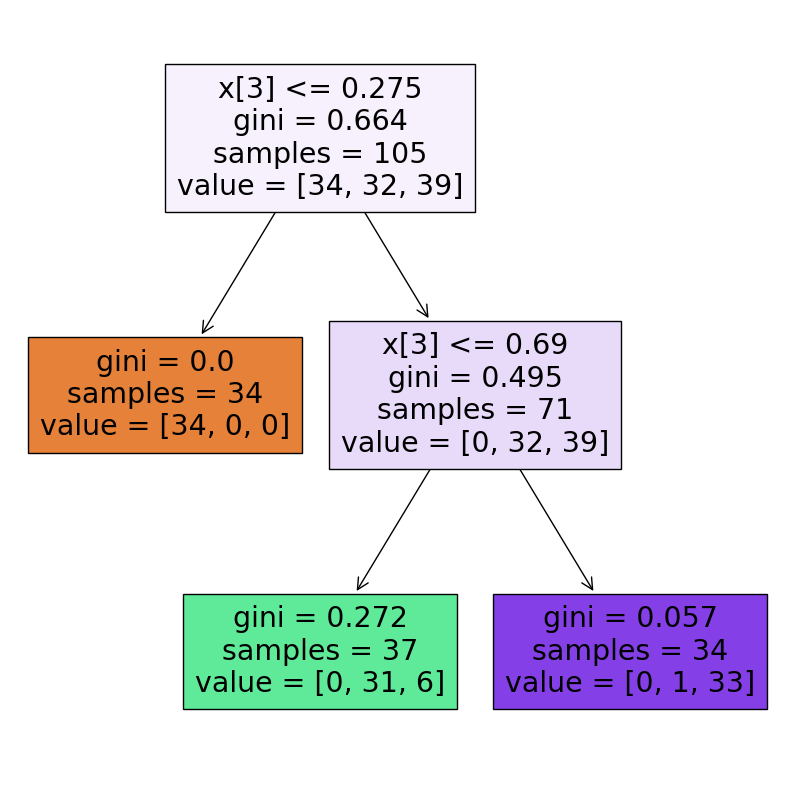

In [56]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 10))
plot_tree(model, filled=True)
plt.show()


In [57]:
# ノード番号1、3、4に到達したアヤメの種類ごとの数
print(model.tree_.value[1]) # ノード番号1に到達したとき
print(model.tree_.value[3]) # ノード番号3に到達したとき
print(model.tree_.value[4]) # ノード番号4に到達したとき

[[34.  0.  0.]]
[[ 0. 31.  6.]]
[[ 0.  1. 33.]]


In [58]:
model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

[Text(0.4, 0.8333333333333334, 'kaben_haba <= 0.275\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.5, 'kaben_haba <= 0.69\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.272\nsamples = 37\nvalue = [0, 31, 6]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.057\nsamples = 34\nvalue = [0, 1, 33]')]

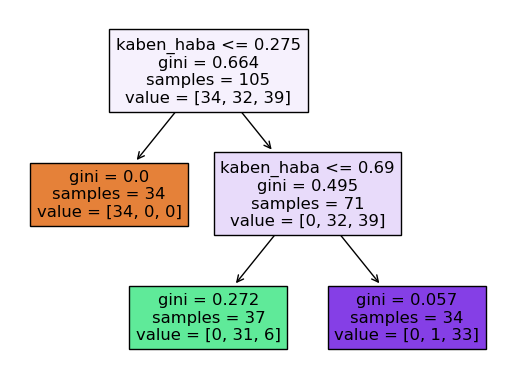

In [60]:
# 描画関数の仕様上、和名の特徴量を英字に直す
x_train.columns = ['gaku_nagasa', 'gaku_haba',
'kaben_nagasa','kaben_haba']
# 描画関数の利用
from sklearn.tree import plot_tree
# plot_tree関数で決定木を描画
plot_tree(model, feature_names = list(x_train.columns),
filled = True)

In [66]:
#gini係数の求め方
print(1-((34/105)**2+(32/105)**2+(39/105)**2))
print(1-((0/71)**2+(32/71)**2+(39/71)**2))
print(1-((0/34)**2+(1/34)**2+(33/34)**2))


0.6643083900226757
0.49513985320372944
0.05709342560553643


In [67]:
#エントロピー
import numpy as np
np.log2(1)


0.0

### 演習

In [117]:
import pandas as pd

df=pd.read_csv("../datafiles/ex2.csv")
df.head(3)

# len(df.index)
# len(df.columns)
df.shape

df["target"]
df["target"].unique()
df["target"].value_counts()

df.drop(columns="target").isnull()
df.drop(columns="target").isnull().sum()

# df2=df
# df2["x1"] = df['x1'].fillna(df["x1"].median())
# df3=df2
# df3["x2"] = df['x2'].fillna(df["x2"].median())
# df3
df3 = df.fillna(df.median())

xcol = ["x0","x1","x2","x3"]
x=df3[xcol]
t=df3["target"]
x
t

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, t,
    test_size = 0.2, random_state = 0)
# 関数のインポート
from sklearn import tree
# モデルの作成
model = tree.DecisionTreeClassifier(max_depth = 3,random_state=0)
model.fit(x_train, y_train) # モデルの学習
# model.score(x_test, y_test) # 学習済みモデルの正解率計算

(20+7)/(20+7+2+3)

model.score(x_test, y_test) # 学習済みモデルの正解率計算

# model.predict([[1.56,0.23,-1.1,-2.8]],feature_names = ["x0", "x1", "x2", "x3"])
data = pd.DataFrame({"x0":[1.56], "x1":[0.23], "x2":[-1.1], "x3":[-2.8]})
model.predict(data)

# df2=df["x1"].fillna(df["x1"].median())

# df2 = df.dropna(how = 'any', axis = 0)

# ("target").isnull()

# df["target"].sum()
# df.

array([1], dtype=int64)

In [115]:
a=b=c=0
pred=[]
for x in x_test.values:
    if x[3] <= 0.275:
        # setosa
        pred.append("setosa")
        a+=1
    else:
        if x[3] <= 0.69:
            #vergicolor
            pred.append("vergicolor")
            b+=1
        else:
            #virginica
            pred.append("virginica")
            c+=1
print(a,b,c)


12 2 6


# 練習問題

In [30]:
import pandas as pd

In [39]:
df = pd.read_csv('ex2.csv')
df.head(3)

,x0,x1,x2,x3,target
0,-1.244674,1.452124,-1.184385,-0.839169,1
1,-1.662920,-0.375804,-0.956673,0.380114,0
2,-1.926513,NaN,-1.203904,-0.728801,1


In [40]:
df.shape

(100, 5)

In [41]:
df["target"].value_counts()

1    80
0    20
Name: target, dtype: int64

In [42]:
df.isnull().sum()

x0        0
x1        1
x2        1
x3        0
target    0
dtype: int64

In [43]:
df2 = df.fillna(df.median())

In [44]:
xcol=['x0','x1','x2','x3']
x = df2[xcol]
t =df2['target']

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, t,
    test_size = 0.2, random_state = 0)

In [46]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 3,
    random_state = 0)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [47]:
model.score(x_test, y_test)

0.95

In [48]:
newdata = [[1.56,0.23, -1.1,2.8]]

answer = model.predict(newdata)
answer

array([1], dtype=int64)